# Ex
### Exercise 7.1
- 12, 15

### Exercise 7.2
- 4, 7, 10

### Exercise 7.3
- 2, 5

### Exercise 7.4
- 7, 10

### Exercise 7.5
- 2, 4

# Com Ex
### Computer Exercise 7.1
- 3

### Computer Exercise 7.2
- 8

### Computer Exercise 7.3
- 5, 14

### Computer Exercise 7.4
- 2, 3, 17

### Computer Exercise 7.5
- 5, 7b

In [3]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

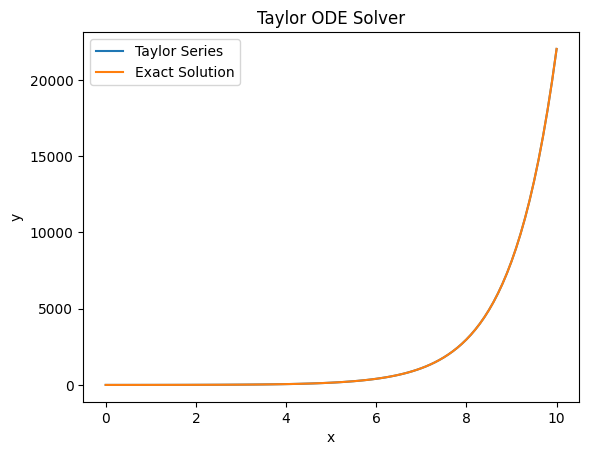

In [4]:
# 7.1 - 3

def taylor_ode_solver(f, y0, x0, x1, h, order=10):
    x = x0
    y = y0
    ret = [(x, y)]
    n = int((x1 - x0) / h)
    for i in range(n):
        tmp = 0
        for j in range(1, order + 1):
            tmp += (h ** j) * (f(x, y) / math.factorial(j))
        y += tmp
        x += h
        ret.append((x, y))
    
    return ret

f = lambda x, y: y  # dy/dx = y
sol = taylor_ode_solver(f, 1, 0, 10, 0.1)

times = [pt[0] for pt in sol]
values = [pt[1] for pt in sol]

plt.plot(times, values, label='Taylor Series')
plt.plot(times, [math.exp(t) for t in times], label='Exact Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Taylor ODE Solver")
plt.legend()
plt.show()


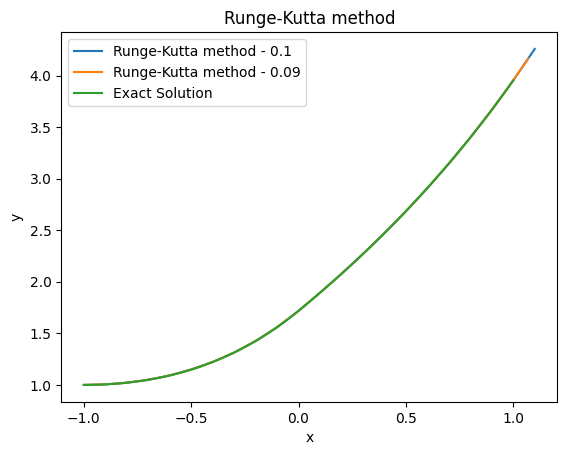

In [5]:
# 7.2 - 8

def fourth_runge_kutta(f, y0, x0, x1, h):
    n = int((x1 - x0) / h) + 1
    x = x0
    y = y0
    ret = [(x, y)]
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        ret.append((x, y))
    
    return ret

def f(t, y):
    if t < 0:
        return y + t
    else:
        return y - t
    
def exact_solution(t):
    if t < 0:
        return math.exp(t+1) - (t+1)
    else:
        return math.exp(t+1) - 2*math.exp(t) + (t+1)
    
sol = fourth_runge_kutta(f, 1, -1, 1, 0.1) 
plt.plot([pt[0] for pt in sol], [pt[1] for pt in sol], label='Runge-Kutta method - 0.1')
sol = fourth_runge_kutta(f, 1, -1, 1, 0.09) 
plt.plot([pt[0] for pt in sol], [pt[1] for pt in sol], label='Runge-Kutta method - 0.09')
x = np.linspace(-1, 1, 100)
plt.plot(x, [exact_solution(t) for t in x], label='Exact Solution')
plt.title('Runge-Kutta method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

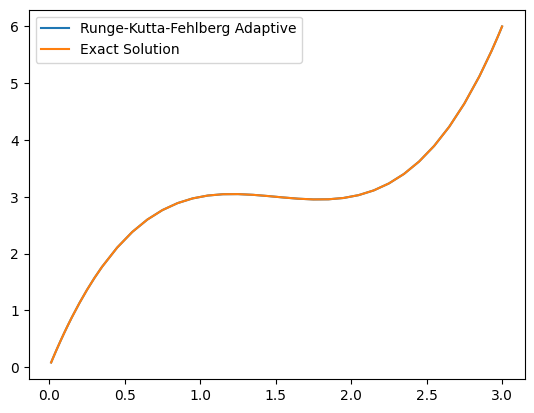

In [6]:
# 7.3 - 5
def runge_kutta_fehlberg_adaptive(f, t0, x0, t1, h0, e_max, e_min, h_max, h_min):
    h = h0
    ret = [(t0, x0)]
    t = t0
    x = x0

    while np.abs(t1 - t) > np.abs(h):
        if (h > 0 and t + h > t1) or (h < 0 and t + h < t1):
            h = t1 - t
        
        if np.abs(h) > np.abs(h_max):
            h = np.sign(h) * np.abs(h_max)
        elif np.abs(h) < np.abs(h_min):
            h = np.sign(h) * np.abs(h_min)

        k1 = h * f(t, x)
        k2 = h * f(t + h / 4, x + k1 / 4)
        k3 = h * f(t + h * 3 / 8, x + k1 * 3 / 32 + k2 * 9 / 32)
        k4 = h * f(t + h * 12 / 13, x + k1 * 1932 / 2197 - k2 * 7200 / 2197 + k3 * 7296 / 2197)
        k5 = h * f(t + h, x + k1 * 439 / 216 - k2 * 8 + k3 * 3680 / 513 - k4 * 845 / 4104)
        k6 = h * f(t + h / 2, x - k1 * 8 / 27 + k2 * 2 - k3 * 3544 / 2565 + k4 * 1859 / 4104 - k5 * 11 / 40)
        
        x4 = x + k1 * 25 / 216 + k3 * 1408 / 2565 + k4 * 2197 / 4104 - k5 / 5
        x_tmp = x + k1 * 16 / 135 + k3 * 6656 / 12825 + k4 * 28561 / 56430 - k5 * 9 / 50 + k6 * 2 / 55
        
        error = np.abs(x_tmp - x4)

        if error > e_max:
            h *= 0.5
            continue
        else:
            t += h
            x = x4
            ret.append((t, x))
            if error < e_min:
                h *= 2

    return ret

exact_solution = lambda x: x**3 - 9 * x**2 / 2 + 13 / 2 * x
f = lambda t, x: 3 * x / t + 9 * t / 2 - 13

sol = runge_kutta_fehlberg_adaptive(f, 3, 6, 0, -0.01, e_max=0.0001, e_min=0.000001, h_max=0.1, h_min=1e-9)
plt.plot([pt[0] for pt in sol], [pt[1] for pt in sol], label='Runge-Kutta-Fehlberg Adaptive')
plt.plot([pt[0] for pt in sol], [exact_solution(pt[0]) for pt in sol], label='Exact Solution')
plt.legend()
plt.show()

x(1) =  1.1345222424000452


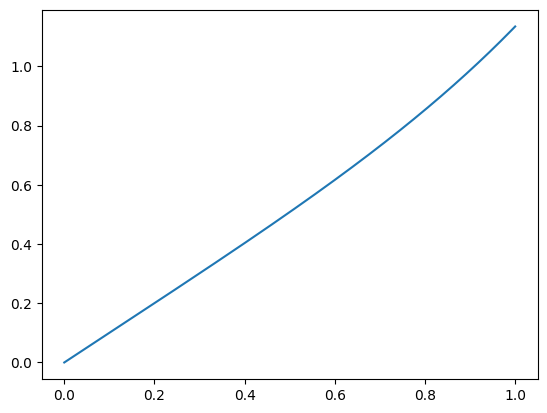

In [7]:
# 7.3 - 14
def fourth_runge_kutta(f, x0, t0, t1, h):
    n = int((t1 - t0) / h) + 1
    t = t0
    x = x0
    ret = [(t, x)]
    for i in range(n):
        k1 = h * f(t, x)
        k2 = h * f(t + h / 2, x + k1 / 2)
        k3 = h * f(t + h / 2, x + k2 / 2)
        k4 = h * f(t + h, x + k3)
        
        x += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
        ret.append((t, x))
    
    return ret

def f(t, x):
    return np.sqrt(1 + x**3)

ret = fourth_runge_kutta(f, 0, 0, 1, 0.000001)
plt.plot([pt[0] for pt in ret], [pt[1] for pt in ret], label='Runge-Kutta method')
print("x(1) = ", ret[-1][1])

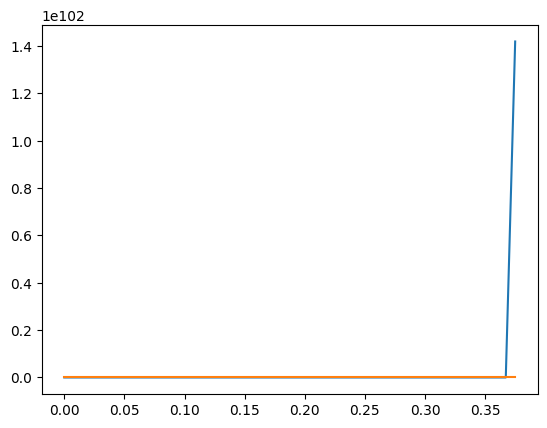

In [20]:
# 7.4 - 2

def rk4(f, x0, y0, t0, t1, h):
    n = int((t1 - t0) / h)
    t = t0
    x = x0
    y = y0
    result = [(t, x, y)]
    for _ in range(n):
        k1x, k1y = f(t, x, y)
        k2x, k2y = f(t + h/2, x + h*k1x/2, y + h*k1y/2)
        k3x, k3y = f(t + h/2, x + h*k2x/2, y + h*k2y/2)
        k4x, k4y = f(t + h, x + h*k3x, y + h*k3y)
        
        x += h * (k1x + 2*k2x + 2*k3x + k4x) / 6
        y += h * (k1y + 2*k2y + 2*k3y + k4y) / 6
        t += h
        result.append((t, x, y))
    return result

def f1(t, x, y):
    # 주어진 1차 미분방정식: x' = t + x**2 - y, y' = t**2 - x + y**2
    return t + x**2 - y, t**2 - x + y**2

# 초기 조건: x(0)=3, y(0)=2, 구간: [0, 0.38], 스텝 h = 1/128
solution = rk4(f1, 3, 2, 0, 0.38, 1/128)
plt.plot([pt[0] for pt in solution], [pt[1] for pt in solution], label='Taylor ODE Solver x')
plt.plot([pt[0] for pt in solution], [pt[2] for pt in solution], label='Taylor ODE Solver y')


this function is special function that can't easily solve with numerical method

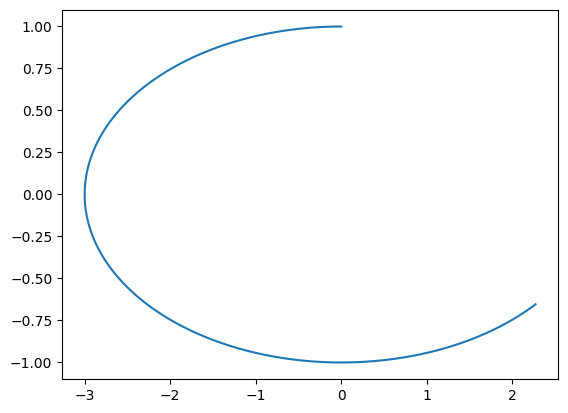

In [9]:
# 7.4 - 3

def runge_kutta_ode(f, x0, y0, t0, t1, h):
    n = int((t1 - t0) / h)
    t = t0
    x = x0
    y = y0
    result = [(t, x, y)]

    for _ in range(n):
        k1_x, k1_y = f(t, x, y)
        k2_x, k2_y = f(t + h / 2, x + k1_x * h / 2, y + k1_y * h / 2)
        k3_x, k3_y = f(t + h / 2, x + k2_x * h / 2, y + k2_y * h / 2)
        k4_x, k4_y = f(t + h, x + k3_x * h, y + k3_y * h)

        x += (k1_x + 2*k2_x + 2*k3_x + k4_x) * h / 6
        y += (k1_y + 2*k2_y + 2*k3_y + k4_y) * h / 6

        t += h
        result.append((t, x, y))

    return result

def f(t, x, y):
    return -3*y, x/3

solution = runge_kutta_ode(f, 0, 1, 0, 4, 0.001)
plt.plot([pt[1] for pt in solution], [pt[2] for pt in solution], label='Runge-Kutta ODE Solver')

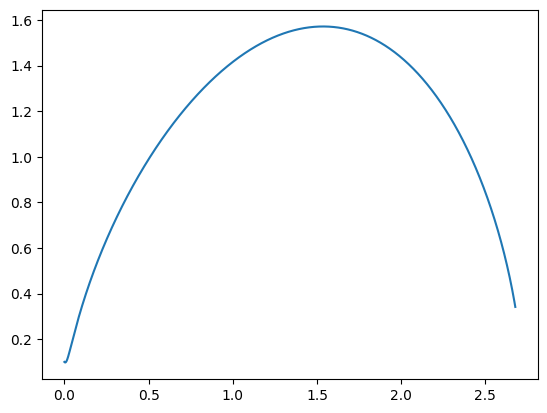

In [10]:
# 7.4 - 17

def runge_kutta_ode(f, x0, y0, t0, t1, h):
    n = int((t1 - t0) / h)
    t = t0
    x = x0
    y = y0
    result = [(t, x, y)]

    for _ in range(n):
        k1_x, k1_y = f(t, x, y)
        k2_x, k2_y = f(t + h / 2, x + k1_x * h / 2, y + k1_y * h / 2)
        k3_x, k3_y = f(t + h / 2, x + k2_x * h / 2, y + k2_y * h / 2)
        k4_x, k4_y = f(t + h, x + k3_x * h, y + k3_y * h)

        x += (k1_x + 2*k2_x + 2*k3_x + k4_x) * h / 6
        y += (k1_y + 2*k2_y + 2*k3_y + k4_y) * h / 6

        t += h
        result.append((t, x, y))

    return result

def f(t, x, y):
    return y, 2*t - y - x**2

solution = runge_kutta_ode(f, 0, 0.1, 0, 3, 0.001)
plt.plot([pt[1] for pt in solution], [pt[2] for pt in solution], label='Runge-Kutta ODE Solver')

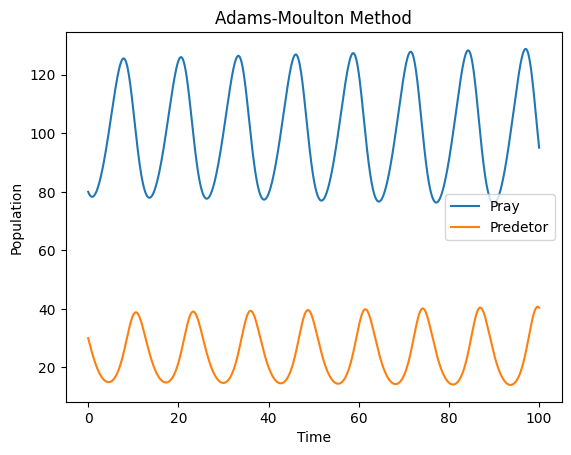

In [26]:
# 7.5 - 4

def fourth_adams_moulton(f, x0, y0, t0, t1, h):
    n = int((t1 - t0) / h)
    t = t0
    x = x0
    y = y0
    result = [(t, x, y)]
    
    for _ in range(n):
        x_prev = x
        y_prev = y

        k1_x, k1_y = f(t + h, x_prev, y_prev)
        k2_x, k2_y = f(t, x_prev, y_prev)
        k3_x, k3_y = f(t - h, x_prev, y_prev)
        k4_x, k4_y = f(t - 2*h, x_prev, y_prev)
        
        x += (h / 24) * (9 * k1_x + 19 * k2_x - 5 * k3_x + k4_x)
        y += (h / 24) * (9 * k1_y + 19 * k2_y - 5 * k3_y + k4_y)
        t += h
        result.append((t, x, y))
        
    return result

a = -1e-2
b = -0.25e2
c = 1e-2
d = -1e2

def f(t, x, y):
    return a*(y + b)*x, c*(x + d)*y

solution = fourth_adams_moulton(f, 80, 30, 0, 100, 0.01)

plt.plot([pt[0] for pt in solution], [pt[1] for pt in solution], label='Pray')
plt.plot([pt[0] for pt in solution], [pt[2] for pt in solution], label='Predetor')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Adams-Moulton Method')
plt.legend()
plt.show()

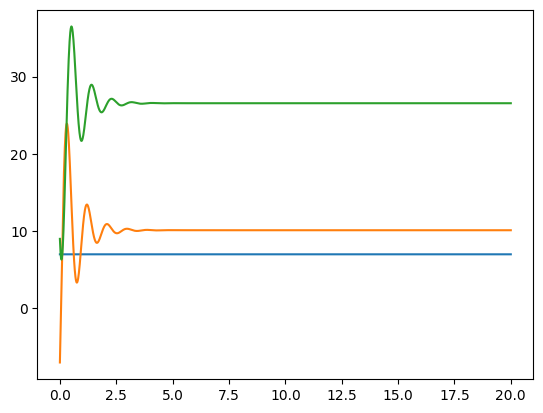

In [40]:
# 7.5 - 7b
v = 1e8

def fourth_adams_moulton_3(f, x0, y0, z0, t0, t1, h):
    n = int((t1 - t0) / h)
    t = t0
    x = x0
    y = y0
    z = z0
    result = [(t, x, y, z)]
    
    for _ in range(n):
        x_prev = x
        y_prev = y
        z_prev = z
        
        k1_x, k1_y, k1_z = f(t + h, x_prev, y_prev, z_prev)
        k2_x, k2_y, k2_z = f(t, x_prev, y_prev, z_prev)
        k3_x, k3_y, k3_z = f(t - h, x_prev, y_prev, z_prev)
        k4_x, k4_y, k4_z = f(t - 2*h, x_prev, y_prev, z_prev)
        
        x += (h / 24) * (9 * k1_x + 19 * k2_x - 5 * k3_x + k4_x)
        y += (h / 24) * (9 * k1_y + 19 * k2_y - 5 * k3_y + k4_y)
        z += (h / 24) * (9 * k1_z + 19 * k2_z - 5 * k3_z + k4_z)
        t += h
        result.append((t, x, y, z))
        
    return result

def f(t, x0, x1, x2):
    return 10*(x1 - x0) / v, x0*(28 - x2) - x1, x0*x1 - 8/3*x2

solution = fourth_adams_moulton_3(f, 7, -7, 9, 0, 20, 0.01)
plt.plot([pt[0] for pt in solution], [pt[1] for pt in solution], label='x')
plt.plot([pt[0] for pt in solution], [pt[2] for pt in solution], label='y')
plt.plot([pt[0] for pt in solution], [pt[3] for pt in solution], label='z')